In [1]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz/bin/'
import pandas as pd
from sklearn import tree
#score
from sklearn.metrics import precision_score, accuracy_score, roc_auc_score, confusion_matrix,f1_score, roc_curve, auc, recall_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

In [2]:
#Read data
df_agg = pd.read_csv("Sample Data/FS_ALL(No Est).csv")
df_agg.head()

,"Total debt service (% of exports of goods, services and primary income)",Short-term debt (% of total external debt),Real interest rate (%),Total reserves minus gold (in %),Trade (% of GDP),Imports of goods and services (current US$),Exports of goods and services (current US$),Current account balance (% of GDP),"Portfolio investment, net (BoP, current US$)","Foreign direct investment, net inflows (% of GDP)",...,Left Government (democ),Polity (polity),Durable (durable),Turnover (xconst),Legislative/Executive election (exrec),State fragility index (sfi),Years (poleff),Economic Effectiveness (ecoeff),Presist (presistance),Target
0,0.0,0.0,0.474178,0.033486,0.505572,0.134906,0.140229,0.511154,0.206589,0.035591,...,1.0,1.0,0.956897,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
1,0.0,0.0,0.382779,0.034902,0.524968,0.165479,0.169241,0.483212,0.206589,0.078971,...,1.0,1.0,0.965517,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
2,0.0,0.0,0.396536,0.036982,0.510508,0.184951,0.191848,0.520425,0.206589,0.113087,...,1.0,1.0,0.974138,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
3,0.0,0.0,0.500240,0.037556,0.518623,0.217342,0.214736,0.401164,0.206589,0.113190,...,1.0,1.0,0.982759,1.0,1.0,0.166667,0.0,0.0,1.0,0.0
4,0.0,0.0,0.626534,0.039688,0.564300,0.256425,0.242148,0.284666,0.206589,0.088505,...,1.0,1.0,0.991379,1.0,1.0,0.166667,0.0,0.0,1.0,0.0


In [3]:
from sklearn import svm
import numpy as np

# 讀入資料
X = df_agg.drop(columns=['Target','Short-term debt (% of total external debt)','Total debt service (% of exports of goods, services and primary income)'])
X = X.values
y = df_agg['Target'].values
X

array([[0.47417818, 0.03348621, 0.50557236, ..., 0.        , 0.        ,
        1.        ],
       [0.38277894, 0.03490153, 0.52496822, ..., 0.        , 0.        ,
        1.        ],
       [0.39653646, 0.03698158, 0.51050831, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.57318437, 0.04131659, 0.21890098, ..., 0.76666667, 0.33333333,
        0.05319149],
       [0.63025998, 0.0517304 , 0.19111615, ..., 0.86666667, 0.33333333,
        0.05319149],
       [0.5063251 , 0.04755578, 0.23535518, ..., 0.96666667, 0.33333333,
        0.05319149]])

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 1)


In [5]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'criterion' :['entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1)
clf = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, scoring=['recall'],refit='recall',verbose=1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:298: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
C:\Users\Use

Confusion Matrix:
 [[28  5]
 [ 1  5]]
Accuracy:         0.8461538461538461
Recall Score:     0.8333333333333334
Precision Score:  0.5
F1 Score:         0.625
ROC_AUC Score:    0.840909090909091


C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


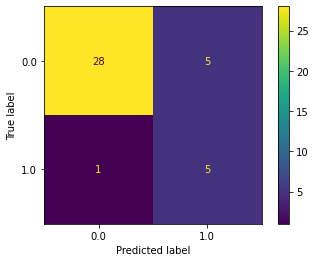

In [6]:
# AFTER CV 
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:        ", accuracy_score(y_test, y_pred))
print("Recall Score:    ", recall_score(y_test, y_pred, zero_division=1))     
print("Precision Score: ",precision_score(y_test, y_pred, zero_division=1))
print("F1 Score:        ", f1_score(y_test, y_pred,zero_division=1))
print("ROC_AUC Score:   ",roc_auc_score(y_test,y_pred,multi_class='ovr'))
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

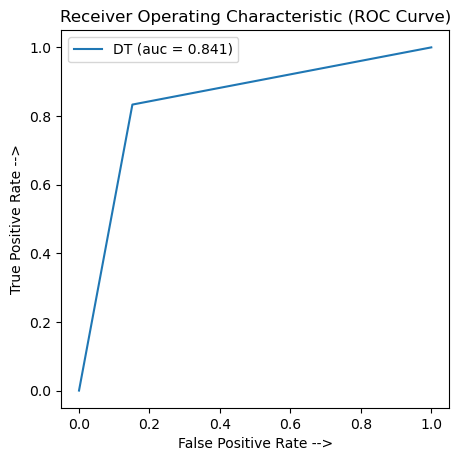

In [7]:

fpr, tpr, threshold = roc_curve(y_test, y_pred)
auc = auc(fpr, tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(fpr, tpr, linestyle='-', label='DT (auc = %0.3f)' % auc)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')
plt.title("Receiver Operating Characteristic (ROC Curve)")
plt.legend()
plt.show()


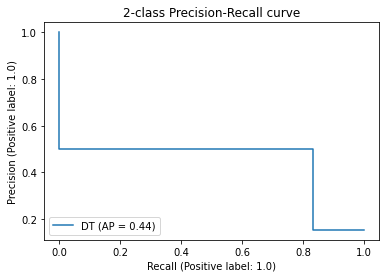

In [8]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="DT"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")